In [3]:
!pip install nltk
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
import nltk
from nltk.tokenize import sent_tokenize

#Sentence Tokenization
text ="""Hello Mr. Smith, how are you doing tody? The weather is greate, and city is awsome.
The Sky is pinkish-blue. You shouldn't eat cardboard"""
tokenized_text = sent_tokenize(text)
print(tokenized_text)

['Hello Mr. Smith, how are you doing tody?', 'The weather is greate, and city is awsome.', 'The Sky is pinkish-blue.', "You shouldn't eat cardboard"]


In [5]:
#word tokenization
from nltk.tokenize import word_tokenize
tokenized_word = word_tokenize(text)
print(tokenized_word)

['Hello', 'Mr.', 'Smith', ',', 'how', 'are', 'you', 'doing', 'tody', '?', 'The', 'weather', 'is', 'greate', ',', 'and', 'city', 'is', 'awsome', '.', 'The', 'Sky', 'is', 'pinkish-blue', '.', 'You', 'should', "n't", 'eat', 'cardboard']


In [6]:
#frequency Distribution
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_word)
print(fdist)
fdist.most_common(2)

<FreqDist with 25 samples and 30 outcomes>


[('is', 3), (',', 2)]

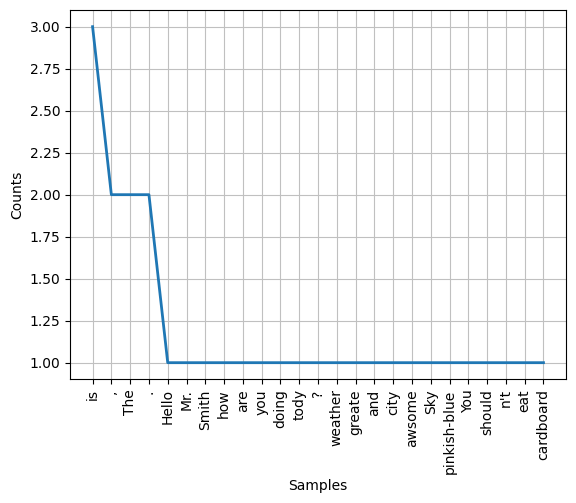

In [7]:
#frequency Distribution plot
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

In [8]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [9]:
#stremming
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()
filltered_sent = []
stemmed_words=[]
for w in filltered_sent:
  stemmed_words.append(ps.steam(w))

print("Filtered Sentence: ",filltered_sent)
print("Stemmed Sentence:",stemmed_words)

Filtered Sentence:  []
Stemmed Sentence: []


In [10]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...


True

In [11]:
#Lexicon Normalization
#performing stemming and lemmatization

from nltk.stem.wordnet import  WordNetLemmatizer
lem= WordNetLemmatizer()

from nltk.stem.porter import PorterStemmer
stem=PorterStemmer()

word = "flying"
print("Lemmatized Word:",lem.lemmatize(word,"v"))
print("Steamed word:",stem.stem(word))

Lemmatized Word: fly
Steamed word: fli


In [12]:
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [13]:
#pos Tagging
sent = "Albert Einstein was born in Ulm, Germany in 1879."

tokens=nltk.word_tokenize(sent)
print(tokens)

['Albert','Einstein','was','born','in','Ulm',',','Germany','in','1879','.']

nltk.pos_tag(tokens)

['Albert', 'Einstein', 'was', 'born', 'in', 'Ulm', ',', 'Germany', 'in', '1879', '.']


[('Albert', 'NNP'),
 ('Einstein', 'NNP'),
 ('was', 'VBD'),
 ('born', 'VBN'),
 ('in', 'IN'),
 ('Ulm', 'NNP'),
 (',', ','),
 ('Germany', 'NNP'),
 ('in', 'IN'),
 ('1879', 'CD'),
 ('.', '.')]

In [14]:
#implementing TD-IDF
import pandas as pd
import sklearn as sklearn
import math
first_sentence = "Data Science is the sexiest job of the 21st century"
second_sentence = "machine learning is the key for data science"

#split so each word have their own string
first_sentence = first_sentence.split(" ")
second_sentence = second_sentence.split(" ")
#join them to remove common duplicate words
total = set(first_sentence).union(set(second_sentence))
print(total)

{'21st', 'learning', 'Science', 'century', 'key', 'the', 'for', 'science', 'is', 'sexiest', 'of', 'machine', 'job', 'data', 'Data'}


In [15]:
wordDictA= dict.fromkeys (total, 0)
wordDictB = dict.fromkeys (total, 0)
for word in first_sentence:
  wordDictA[word]+=1

for word in second_sentence:
  wordDictB[word]+=1
pd.DataFrame([wordDictA, wordDictB])

,21st,learning,Science,century,key,the,for,science,is,sexiest,of,machine,job,data,Data
0,1,0,1,1,0,2,0,0,1,1,1,0,1,0,1
1,0,1,0,0,1,1,1,1,1,0,0,1,0,1,0


In [17]:
def computerTF(wordDict, doc):
  tfDict = {}
  corpusCount = len(doc)
  for word, count in wordDict.items():
    tfDict[word] = count/float(corpusCount)
  retutn(tfDict)

In [19]:
#first step is to import the library 
from sklearn.feature_extraction.text import TfidfVectorizer 
#for the sentence, make sure all words are lowercase or you will run #into error. for simplicity, I just made the same sentence all #lowercase
firstv="Data Science is the sexiest job of the 21st century" 
secondv= "machine learning is the key for data science" 
#calling the TfidfVectorizer
vectorize= TfidfVectorizer() 
#fitting the model and passing our sentences right away: 
response = vectorize.fit_transform([firstv, secondv])
print(response)

  (0, 1)	0.34211869506421816
  (0, 0)	0.34211869506421816
  (0, 9)	0.34211869506421816
  (0, 5)	0.34211869506421816
  (0, 11)	0.34211869506421816
  (0, 12)	0.48684053853849035
  (0, 4)	0.24342026926924518
  (0, 10)	0.24342026926924518
  (0, 2)	0.24342026926924518
  (1, 3)	0.40740123733358447
  (1, 6)	0.40740123733358447
  (1, 7)	0.40740123733358447
  (1, 8)	0.40740123733358447
  (1, 12)	0.28986933576883284
  (1, 4)	0.28986933576883284
  (1, 10)	0.28986933576883284
  (1, 2)	0.28986933576883284
